# Plots full campaign time series of sounding parameters, CSAPR cell statistics and precipitation for Feng et al. (2022) MWR paper

In [1]:
import os
import glob
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import xarray as xr
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import pandas as pd
import datetime
import copy
import metpy.calc as mpcalc
from metpy.units import units
# %matploblib inline

In [2]:
# # # iclassdir = '/global/project/projectdirs/m1657/zfeng/cacti/arm/csapr/'
# # # statsdir = f'{iclassdir}taranis_corcsapr2cfrppiqcM1_celltracking.c1.new/stats/'
# # iclassdir = '/global/cscratch1/sd/feng045/iclass/cacti/arm/csapr/'
# # statsdir = f'{iclassdir}/test_pyflextrkr/stats/'
# # terrain_file = f'{iclassdir}corgridded_terrain.c0/topo_cacti_csapr2_large.nc'
# # # stats_file = f'{statsdir}/stats_tracknumbersv1.0_20181015.0000_20190303.0000.nc'
# # stats_file = f'{statsdir}/trackstats_20181015.0000_20190303.0000.nc'
# # sondeparam_file = f'{statsdir}Interpsonde_parameters_CACTI_AMF_2Oct-30Apr_v3.1.1.nc'
# # sonde_file = f'/global/project/projectdirs/m1657/zfeng/cacti/arm/sounding_stats/corinterpolatedsondeM1.c1.20181001_20190430_resample3H.nc'
# # rain_file = f'{statsdir}csapr2_domain_mean_rain_20181015_20190303.nc'

# iclassdir = '/global/project/projectdirs/m1657/zfeng/cacti/arm/csapr/'
# statsdir = f'{iclassdir}/taranis_corcsapr2cfrppiqcM1_celltracking.c1/stats/'
# terrain_file = f'{iclassdir}corgridded_terrain.c0/topo_cacti_csapr2_large.nc'
# stats_file = f'{statsdir}/trackstats_20181015.0000_20190303.0000.nc'
# sondeparam_file = f'{statsdir}Interpsonde_parameters_CACTI_AMF_2Oct-30Apr_v3.1.1.nc'
# sonde_file = f'/global/project/projectdirs/m1657/zfeng/cacti/arm/sounding_stats/corinterpolatedsondeM1.c1.20181001_20190430_resample3H.nc'
# rain_file = f'{statsdir}csapr2_domain_mean_rain_20181015_20190303.nc'

# radar_lat = -32.1264
# radar_lon = -64.7284

# # figdir = f'{iclassdir}taranis_corcsapr2cfrppiqcM1_celltracking.c1.new/figures/celltrack_environment_stats_jim/'
# # figdir = f'{iclassdir}test_pyflextrkr/figures/celltrack_environment_stats/'
# figdir = f'{iclassdir}taranis_corcsapr2cfrppiqcM1_celltracking.c1/figures/celltrack_environment_stats/'
# figdir_jointhist = f'{figdir}jointhist/'
# os.makedirs(figdir, exist_ok=True)
# os.makedirs(figdir_jointhist, exist_ok=True)

In [3]:
iclassdir = '/gpfs/wolf2/arm/atm131/proj-shared/zfeng/cacti/csapr/'
statsdir = f'{iclassdir}/taranis_corcsapr2cfrppiqcM1_celltracking.c1.v2/stats/'
# terrain_file = f'{iclassdir}corgridded_terrain.c0/topo_cacti_csapr2_large.nc'
stats_file = f'{statsdir}/trackstats_20181015.0000_20190303.0000.nc'
sondeparam_file = f'{statsdir}Interpsonde_parameters_CACTI_AMF_2Oct-30Apr_v5.3.nc'
sonde_file = f'/gpfs/wolf2/arm/atm131/proj-shared/zfeng/cacti/sounding_stats/cormergesonde2maceM1.c1.20181005_20190430_resample3H.nc'
rain_file = f'{statsdir}csapr2_domain_mean_rain_20181015_20190303.nc'

radar_lat = -32.1264
radar_lon = -64.7284

figdir = f'{iclassdir}taranis_corcsapr2cfrppiqcM1_celltracking.c1.v2/figures/celltrack_environment_stats/'
figdir_jointhist = f'{figdir}jointhist/'
os.makedirs(figdir, exist_ok=True)
os.makedirs(figdir_jointhist, exist_ok=True)

In [5]:
# terr = xr.open_dataset(terrain_file)
# topoZ = terr['z']
# topoLon = terr['x']
# topoLat = terr['y']
# # topoZ = terr.hgt
# # topoLon = terr.longitude
# # topoLat = terr.latitude

# topoZ.plot(vmin=0, vmax=2250, cmap='terrain')

In [6]:
# Read domain mean rain file
dsrain = xr.open_dataset(rain_file)
time_rain = dsrain.time
dsrain

<xarray.Dataset> Size: 174kB
Dimensions:          (time: 8721)
Coordinates:
  * time             (time) datetime64[ns] 70kB 2018-10-15T00:00:03 ... 2019-...
Data variables:
    rain             (time) float32 35kB ...
    rain_convective  (time) float32 35kB ...
    rain_stratiform  (time) float32 35kB ...
Attributes:
    title:       CACTI CSAPR2 eastern domain mean precipitation
    xmin_meter:  -25000
    xmax_meter:  110000
    contact:     Zhe Feng, zhe.feng@pnnl.gov
    created_on:  Fri Apr  2 16:16:17 2021

In [7]:
# Read interpsonde profile data
dsprof = xr.open_dataset(sonde_file)
dsprof

<xarray.Dataset> Size: 109MB
Dimensions:                            (time: 1664, height: 316)
Coordinates:
  * time                               (time) datetime64[ns] 13kB 2018-10-05 ...
  * height                             (height) float32 1kB 1.141 ... 61.14
Data variables: (12/59)
    base_time                          datetime64[ns] 8B ...
    time_offset                        (time) datetime64[ns] 13kB ...
    precip                             (time) float32 7kB ...
    qc_precip                          (time) float32 7kB ...
    temp                               (time, height) float32 2MB ...
    qc_temp                            (time, height) float32 2MB ...
    ...                                 ...
    qc_u_wind_interpolatedsonde        (time, height) float32 2MB ...
    v_wind_interpolatedsonde           (time, height) float32 2MB ...
    qc_v_wind_interpolatedsonde        (time, height) float32 2MB ...
    lat                                float32 4B ...
    lon                                float32 4B ...
    alt                                float32 4B ...
Attributes: (12/15)
    command_line:          idl -R -n mergesonde2mace -s cor -f M1 -b 20181005...
    Conventions:           ARM-1.3
    process_version:       vap-mergesonde2mace-1.0-0.dev2.dirty.el7
    input_datastreams:     corera5plevelsM1.a1 : Unknown : 20181004.000000-20...
    dod_version:           mergesonde2mace-c1-4.0
    site_id:               cor
    ...                    ...
    location_description:  Cloud, Aerosol, and Complex Terrain Interactions (...
    datastream:            cormergesonde2maceM1.c1
    reference:             Technical document ("Merged Sounding Value-Added P...
    doi:                   10.5439/1095335
    history:               Fri Mar 19 16:18:38 2021: ncrcat cormergesonde2mac...
    NCO:                   netCDF Operators version 4.7.9 (Homepage = http://...

In [8]:
# Read sonde data
sonde = xr.open_dataset(sondeparam_file)
sonde

<xarray.Dataset> Size: 40MB
Dimensions:                      (time: 20256, len: 6)
Coordinates:
  * time                         (time) datetime64[ns] 162kB 2018-10-02 ... 2...
Dimensions without coordinates: len
Data variables: (12/245)
    yyyymmdd                     (time) float64 162kB ...
    hhmmss                       (len, time) |S1 122kB ...
    tallenough_sfc               (time) float64 162kB ...
    CAPE_sfc                     (time) float64 162kB ...
    pseCAPE_sfc                  (time) float64 162kB ...
    CIN_NA_sfc                   (time) float64 162kB ...
    ...                           ...
    RH_mean_LFCp3_sfc            (time) float64 162kB ...
    RH_mean_LFCp4_sfc            (time) float64 162kB ...
    RH_mean_LFCp1_mu             (time) float64 162kB ...
    RH_mean_LFCp2_mu             (time) float64 162kB ...
    RH_mean_LFCp3_mu             (time) float64 162kB ...
    RH_mean_LFCp4_mu             (time) float64 162kB ...

In [9]:
# Resample time series to a coarser resolution for plotting
rr_total_ts = dsrain.rain.resample(time='6h').mean()
rr_conv_ts = dsrain.rain_convective.resample(time='6h').mean()
rr_strat_ts = dsrain.rain_stratiform.resample(time='6h').mean()
# rr_total_ts = dsrain.rain.resample(time='12H').mean()
# rr_conv_ts = dsrain.rain_convective.resample(time='12H').mean()
# rr_strat_ts = dsrain.rain_stratiform.resample(time='12H').mean()
time_ts = rr_total_ts.time
# Calculate mean value using native value
rr_total_avg = dsrain.rain.mean().values
rr_conv_avg = dsrain.rain_convective.mean().values
rr_strat_avg = dsrain.rain_stratiform.mean().values
print(f'Total: {rr_total_avg}, Conv: {rr_conv_avg}, Strat: {rr_strat_avg}')

# Accumulation rain amount, summing mm/h over 15min (0.25 hour), need to divide by 4 to get to mm
ra_total = dsrain.rain.cumsum() / 4
ra_conv = dsrain.rain_convective.cumsum() / 4
ra_strat = dsrain.rain_stratiform.cumsum() / 4

Total: 0.18595443665981293, Conv: 0.06444628536701202, Strat: 0.10187361389398575


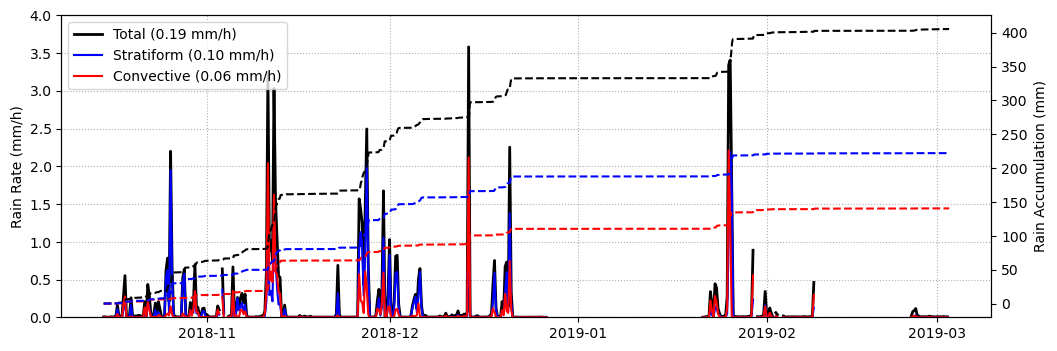

In [10]:
fig, ax = plt.subplots(figsize=[12,4], dpi=100)
ax.plot(time_ts, rr_total_ts, color='k', lw=2, label=f'Total ({rr_total_avg:.02f} mm/h)')
ax.plot(time_ts, rr_strat_ts, color='blue', lw=1.5, label=f'Stratiform ({rr_strat_avg:.02f} mm/h)')
ax.plot(time_ts, rr_conv_ts, color='red', lw=1.5, label=f'Convective ({rr_conv_avg:.02f} mm/h)')
ax.set_ylabel('Rain Rate (mm/h)')
ax.legend(loc='upper left')
ax.set_ylim(0,4)
ax2 = ax.twinx()
ax2.plot(dsrain.time, ra_total, color='k', ls='--')
ax2.plot(dsrain.time, ra_conv, color='r', ls='--')
ax2.plot(dsrain.time, ra_strat, color='b', ls='--')
ax2.set_ylabel('Rain Accumulation (mm)')
ax.grid(ls=':')

In [11]:
# Read 2D track data
stats = xr.open_dataset(stats_file)
time_res = stats.attrs['time_resolution_hour']
pixel_radius = stats.attrs['pixel_radius_km']
stats.sizes['tracks']

6883

In [12]:
# # Combine datasets by coordinates
# # stats = xr.combine_by_coords([stats2d, stats3d, sat, sonde], combine_attrs='override')
# stats = xr.combine_by_coords([stats2d, sat, sonde], combine_attrs='override')
# stats.load()
# print(stats)

In [13]:
Wdir_850mb = mpcalc.wind_direction(sonde.U_850mb * units('m/s'), sonde.V_850mb * units('m/s')).compute()
Wdir_850mb
# U850_3h = sonde.U_850mb.resample(time='3H').mean()
# V850_3h = sonde.V_850mb.resample(time='3H').mean()
# Wdir_850mb_3h = mpcalc.wind_direction(U850_3h * units('m/s'), V850_3h * units('m/s'))

Magnitude,[8.70143359660868 8.857458643356878 9.19308016010983 ... 336.7812106734945 328.7661100518702 314.1328492340158]
Units,degree


(array([5049., 3233., 1526.,  938.,  722.,  906.,  911., 1266., 1608.,
         900.,  363.,  239.,  137.,  203.,  151.,  162.,  416., 1526.]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.,
        220., 240., 260., 280., 300., 320., 340., 360.]),
 <BarContainer object of 18 artists>)

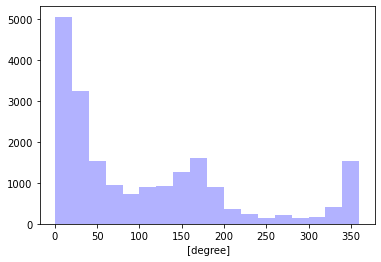

In [14]:
Wdir_850mb.plot.hist(bins=np.arange(0,360.1,20), color='b', alpha=0.3, density=False)
# Wdir_850mb_3h.plot.hist(bins=np.arange(0,360.1,20), color='r', alpha=0.3, density=True)

In [15]:
def calc_bin_avg_quantiles(array_in, array4bins, bins, quantiles):
    """
    Calculate average, quantiles from an array as a function of another array separated into bins.
    """
    # Get number of samples in each bin
    nsamples, tmp = np.histogram(array4bins, bins=bins, density=False)
    # Make output arrays
    bin_pts = np.full((len(bins)-1, len(quantiles)), np.nan, dtype=float)
    bin_avg = np.full(len(bins)-1, np.nan, dtype=float)
    # Loop over each bin
    for ibin in range(len(bins)-1):
        # Find indices belonging to a bin
        idx = np.where((array4bins.values >= bins[ibin]) & (array4bins.values < bins[ibin+1]))[0]
        # Calculate quantiles, averages
        bin_pts[ibin,:] = np.nanquantile(array_in.values[idx], quantiles)
        bin_avg[ibin] = np.nanmean(array_in.values[idx])
    return (bin_avg, bin_pts, nsamples)

In [16]:
quantiles = [0.25,0.5,0.75]
Wdir_bins = np.arange(0,360.1,20)

cape = sonde['CAPE_mu'].where(sonde['CAPE_mu'] > 0)
lnb_z = sonde['EL_height_mu'].where(sonde['EL_height_mu'] >= 0) / 1000
q850mb = sonde['rvap_850mb']

cape_Wdir850mb_avg, cape_Wdir850mb_pts, cape_Wdir850mb_ns = calc_bin_avg_quantiles(cape, Wdir_850mb, Wdir_bins, quantiles)
lnb_Wdir850mb_avg, lnb_Wdir850mb_pts, lnb_Wdir850mb_ns = calc_bin_avg_quantiles(lnb_z, Wdir_850mb, Wdir_bins, quantiles)
q850mb_Wdir850mb_avg, q850mb_Wdir850mb_pts, q850mb_Wdir850mb_ns = calc_bin_avg_quantiles(q850mb, Wdir_850mb, Wdir_bins, quantiles)

In [17]:
def plot_bin_avg_quantiles(bins, array_avg, array_pts, array_ns, xlabel, ylabel, title, figname):

    mpl.rcParams['font.size'] = 16
    mpl.rcParams['font.family'] = 'Helvetica'
    fig, axes = plt.subplots(1, 1, figsize=(8, 5), dpi=100)

    ax1 = axes
    # ax1.plot(bins[:-1], array_pts[:,1], linestyle='none', marker='s', color='k')
    for ibin in range(len(bins)-1):
        ax1.plot((bins[ibin],bins[ibin]), array_pts[ibin,(0,2)], color='k')
    ax1.plot(bins[:-1], array_avg, 'o-', color='k', markersize=5)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    ax1.set_title(title, loc='left')
    ax1.grid(ls='--')

    ax2 = ax1.twinx()
    ax2.plot(bins[:-1], array_ns, color='b')
    ax2.set_ylabel('Sample (#)', color='b')
    # ax2.set_ylim(4, 18)
    ax2.tick_params(axis='y', labelcolor='b')
    ax2.spines['right'].set_color('b')
    fig.savefig(figname, bbox_inches='tight', dpi=300, facecolor='w')
    
    return fig

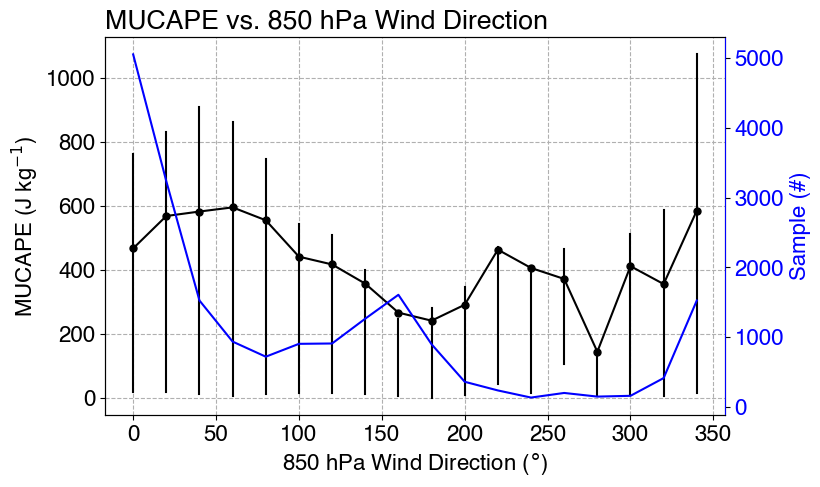

In [18]:
xlabel = '850 hPa Wind Direction ($\degree$)'
ylabel = 'MUCAPE (J kg$^{-1}$)'
title = 'MUCAPE vs. 850 hPa Wind Direction'
figname = f'{figdir}MUCAPE_WindDirection850mb_bin_quantiles_fullcampaign.png'
fig = plot_bin_avg_quantiles(Wdir_bins, cape_Wdir850mb_avg, cape_Wdir850mb_pts, cape_Wdir850mb_ns, xlabel, ylabel, title, figname)

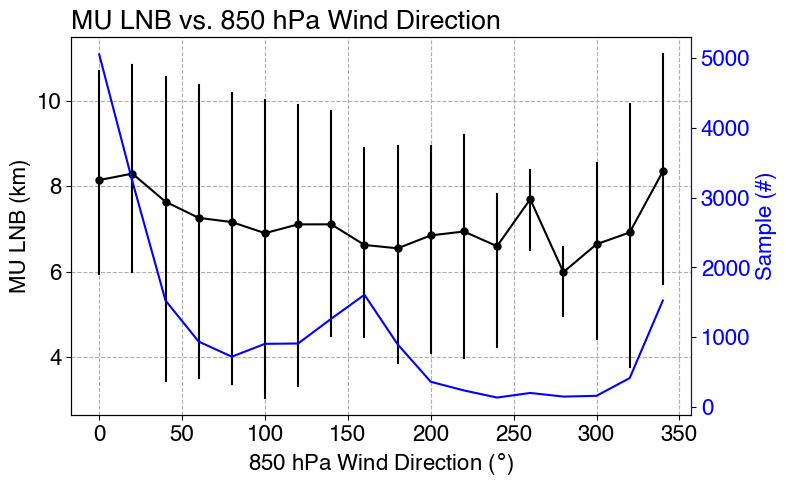

In [19]:
xlabel = '850 hPa Wind Direction ($\degree$)'
ylabel = 'MU LNB (km)'
title = 'MU LNB vs. 850 hPa Wind Direction'
figname = f'{figdir}MULNB_WindDirection850mb_bin_quantiles_fullcampaign.png'
fig = plot_bin_avg_quantiles(Wdir_bins, lnb_Wdir850mb_avg, lnb_Wdir850mb_pts, lnb_Wdir850mb_ns, xlabel, ylabel, title, figname)

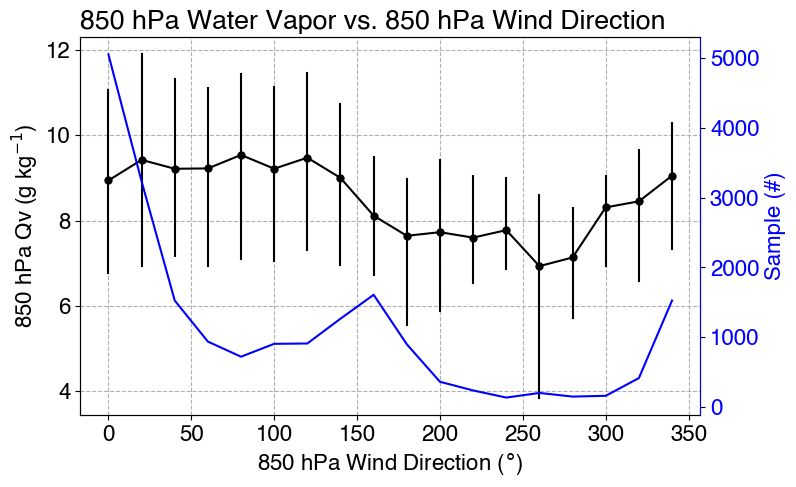

In [20]:
xlabel = '850 hPa Wind Direction ($\degree$)'
ylabel = '850 hPa Qv (g kg$^{-1}$)'
title = '850 hPa Water Vapor vs. 850 hPa Wind Direction'
figname = f'{figdir}Qv850_WindDirection850mb_bin_quantiles_fullcampaign.png'
fig = plot_bin_avg_quantiles(Wdir_bins, q850mb_Wdir850mb_avg, q850mb_Wdir850mb_pts, q850mb_Wdir850mb_ns, xlabel, ylabel, title, figname)

In [21]:
figdir

'/gpfs/wolf2/arm/atm131/proj-shared/zfeng/cacti/csapr/taranis_corcsapr2cfrppiqcM1_celltracking.c1.v2/figures/celltrack_environment_stats/'

In [22]:
tracks = stats['tracks']
times = stats['times']
# height = stats['z'] / 1000.
# time_res = stats.attrs['time_resolution_hour']
# pixel_radius = stats.attrs['pixel_radius_km']
print(f'Number of total tracks: {len(tracks)}')

# Get cell initial location
cell_lon0 = stats['cell_meanlon'].isel(times=0)
# Remove NaN
ind = np.where(~np.isnan(cell_lon0))[0]
ntracks = len(ind)
print(f'Number of valid tracks: {ntracks}')

# Subset tracks for the entire dataset
stats = stats.isel(tracks=ind)
stats.sizes['tracks']

Number of total tracks: 6883
Number of valid tracks: 6883


6883

In [23]:
# lifetime = stats['lifetime'] * time_res
lifetime = stats['track_duration'] * time_res
start_time = stats['start_basetime']
end_time = stats['end_basetime']
end_merge_tracknumber = stats['end_merge_tracknumber']
start_split_tracknumber = stats['start_split_tracknumber']
cell_lon = stats['cell_meanlon']
cell_lat = stats['cell_meanlat']
cell_area = stats['cell_area']
maxrange_flag = stats['maxrange_flag']
max_dbz = stats['max_dbz']

eth10 = stats['maxETH_10dbz']
eth20 = stats['maxETH_20dbz']
eth30 = stats['maxETH_30dbz']
eth40 = stats['maxETH_40dbz']
eth50 = stats['maxETH_50dbz']

In [24]:
# Get track start values
start_maxrange_flag = maxrange_flag.isel(times=0)
start_lon = cell_lon.isel(times=0)
start_lat = cell_lat.isel(times=0)

# Get duration (lifetime counts) and maxrange_flag in Numpy arrays for speed
duration = (lifetime.values / time_res).astype(int)
rangeflag = maxrange_flag.values.astype(int)
celllon = cell_lon.values
celllat = cell_lat.values

end_maxrange_flag = np.ones(ntracks, dtype=int)
end_lon = np.full(ntracks, np.NaN, dtype=float)
end_lat = np.full(ntracks, np.NaN, dtype=float)

# Get track last valid value
for ii in range(0, ntracks):
    # Get duration for the track
    iduration = duration[ii]
    # Get valid values for the track
    imaxrangeflag = rangeflag[ii,0:iduration]
    icell_lon = celllon[ii,0:iduration]
    icell_lat = celllat[ii,0:iduration]
    
    # Get last value from the track
    end_maxrange_flag[ii] = imaxrangeflag[-1]
    end_lon[ii] = icell_lon[-1]
    end_lat[ii] = icell_lat[-1]

/tmp/ipykernel_2553615/1435975721.py:8: RuntimeWarning: invalid value encountered in cast
  rangeflag = maxrange_flag.values.astype(int)


In [25]:
# Get track start/end hour
start_hour = start_time.dt.hour
end_hour = end_time.dt.hour

# Find tracks not end with merge or not start with split
nonmerge = np.where(np.isnan(end_merge_tracknumber))[0]
nonsplit = np.where(np.isnan(start_split_tracknumber))[0]
ntracks_nonmerge = len(nonmerge)
ntracks_nonsplit = len(nonsplit)
print(f'Number of non-merge tracks: {ntracks_nonmerge}')
print(f'Number of non-split tracks: {ntracks_nonsplit}')

nonsplit_in = np.where(np.isnan(start_split_tracknumber) & (start_maxrange_flag == 1))[0]
nonmerge_in = np.where(np.isnan(end_merge_tracknumber) & (end_maxrange_flag == 1))[0]
ntracks_nonsplit_in = len(nonsplit_in)
ntracks_nonmerge_in = len(nonmerge_in)
print(f'Number of non-split tracks within max range: {ntracks_nonsplit_in}')
print(f'Number of non-merge tracks within max range: {ntracks_nonmerge_in}')

merge = np.where(end_merge_tracknumber > 0)[0]
split = np.where(start_split_tracknumber > 0)[0]
ntracks_merge = len(merge)
ntracks_split = len(split)
print(f'Number of merge tracks: {ntracks_merge}')
print(f'Number of split tracks: {ntracks_split}')

Number of non-merge tracks: 5289
Number of non-split tracks: 5358
Number of non-split tracks within max range: 4850
Number of non-merge tracks within max range: 4528
Number of merge tracks: 1594
Number of split tracks: 1525


In [26]:
cell_diam = 2 * np.sqrt(cell_area / np.pi)
cell_diam_max = cell_diam.max(dim='times')
cell_area_max = cell_area.max(dim='times')
cell_eth20_max = eth20.max(dim='times')

In [27]:
# This is to address reviewer #3's comment #22, 
# Are these deep, intense cells mostly concentrated within a few days? 
# Is it  a small enough sample to dive a bit more into the evolution of the cells and their environments for those most intense/deep days?
start_date = start_time.dt.strftime('%b-%d')
maxdbz_lifetime = max_dbz.max(dim='times')
intense_dbz_dates_unique, ncells_by_date = np.unique(start_date.where(maxdbz_lifetime >= 60, drop=True), return_counts=True)
intense_dbz_dates_unique, ncells_by_date

(array(['Dec-04', 'Dec-05', 'Dec-06', 'Dec-10', 'Dec-13', 'Dec-14',
        'Dec-19', 'Dec-20', 'Dec-21', 'Feb-01', 'Feb-03', 'Feb-08',
        'Jan-22', 'Jan-23', 'Jan-24', 'Jan-25', 'Jan-26', 'Jan-29',
        'Jan-31', 'Nov-03', 'Nov-04', 'Nov-05', 'Nov-06', 'Nov-07',
        'Nov-10', 'Nov-11', 'Nov-12', 'Nov-13', 'Nov-25', 'Nov-27',
        'Nov-29', 'Nov-30', 'Oct-17', 'Oct-18', 'Oct-21', 'Oct-22',
        'Oct-28', 'Oct-29', 'Oct-30', 'Oct-31'], dtype=object),
 array([ 1,  2,  1,  2,  3, 14,  4, 14,  1,  1,  1,  7,  3, 13,  1, 17,  8,
         8,  6,  3,  1,  7,  2,  1,  8, 37, 28,  2,  1,  2,  9,  7,  4, 13,
         3,  5,  1,  2, 11,  1]))

In [28]:
intense_dbz_dates_unique[ncells_by_date >= 10]

array(['Dec-14', 'Dec-20', 'Jan-23', 'Jan-25', 'Nov-11', 'Nov-12',
       'Oct-18', 'Oct-30'], dtype=object)

In [29]:
sonde.keys()

KeysView(<xarray.Dataset> Size: 40MB
Dimensions:                      (time: 20256, len: 6)
Coordinates:
  * time                         (time) datetime64[ns] 162kB 2018-10-02 ... 2...
Dimensions without coordinates: len
Data variables: (12/245)
    yyyymmdd                     (time) float64 162kB ...
    hhmmss                       (len, time) |S1 122kB ...
    tallenough_sfc               (time) float64 162kB ...
    CAPE_sfc                     (time) float64 162kB ...
    pseCAPE_sfc                  (time) float64 162kB ...
    CIN_NA_sfc                   (time) float64 162kB ...
    ...                           ...
    RH_mean_LFCp3_sfc            (time) float64 162kB ...
    RH_mean_LFCp4_sfc            (time) float64 162kB ...
    RH_mean_LFCp1_mu             (time) float64 162kB ...
    RH_mean_LFCp2_mu             (time) float64 162kB ...
    RH_mean_LFCp3_mu             (time) float64 162kB ...
    RH_mean_LFCp4_mu             (time) float64 162kB ...)

In [30]:
# Create a standard time series bins
date_ts = pd.date_range(start='2018-10-15T00', end='2019-03-02T23', freq='6h')
# Make bounds for pcolormesh
date_ts_bounds = pd.date_range(start='2018-10-15T00', end='2019-03-03T00', freq='6h')
ndate_ts = len(date_ts)
print(date_ts)
print(date_ts.shape, date_ts_bounds.shape)

DatetimeIndex(['2018-10-15 00:00:00', '2018-10-15 06:00:00',
               '2018-10-15 12:00:00', '2018-10-15 18:00:00',
               '2018-10-16 00:00:00', '2018-10-16 06:00:00',
               '2018-10-16 12:00:00', '2018-10-16 18:00:00',
               '2018-10-17 00:00:00', '2018-10-17 06:00:00',
               ...
               '2019-02-28 12:00:00', '2019-02-28 18:00:00',
               '2019-03-01 00:00:00', '2019-03-01 06:00:00',
               '2019-03-01 12:00:00', '2019-03-01 18:00:00',
               '2019-03-02 00:00:00', '2019-03-02 06:00:00',
               '2019-03-02 12:00:00', '2019-03-02 18:00:00'],
              dtype='datetime64[ns]', length=556, freq='6h')
(556,) (557,)


In [31]:
# Approximate longitude of SDC ridge
# lon_SDC = -64.9
# lon_eSDC = [-64.9, -63.]
lon_SDC = -65
lon_eSDC = [-65, -63]
idx_eSDC = np.where(start_lon > lon_SDC)[0]
idx_wSDC = np.where(start_lon <= lon_SDC)[0]
ntracks_e = len(idx_eSDC)
ntracks_w = len(idx_wSDC)
print(f'E.SDC ntracks: {ntracks_e}, W.SDC ntracks: {ntracks_w}')

start_time_e = start_time.isel(tracks=idx_eSDC)
start_time_w = start_time.isel(tracks=idx_wSDC)

E.SDC ntracks: 4908, W.SDC ntracks: 1975


In [32]:
bins_area = np.arange(1, 3.41, 0.12)
bins_diam = np.arange(4, 25.1, 1)
bins_eth = np.arange(1, 20.1, 1)
nbins_diam = len(bins_diam)
nbins_area = len(bins_area)
nbins_eth = len(bins_eth)
pdf_celldiam, bins = np.histogram(cell_diam_max, bins=bins_diam, density=True)
pdf_cellarea, bins = np.histogram(np.log10(cell_area_max), bins=bins_area, density=True)
pdf_eth20, bins = np.histogram(cell_eth20_max, bins=bins_eth, density=True)

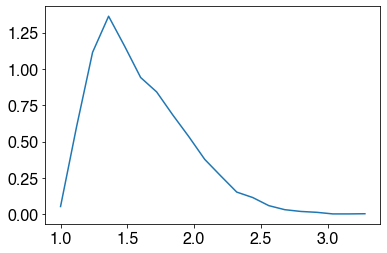

In [33]:
plt.plot(bins_area[:-1], pdf_cellarea)

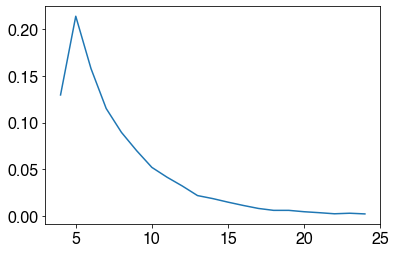

In [34]:
plt.plot(bins_diam[:-1], pdf_celldiam)

In [35]:
ntracks_ts = np.full(ndate_ts, np.nan, dtype=float)
ntracks_e_ts = np.full(ndate_ts, np.nan, dtype=float)
ntracks_w_ts = np.full(ndate_ts, np.nan, dtype=float)
cellarea_avg_ts = np.full(ndate_ts, 0, dtype=float)
celldiam_avg_ts = np.full(ndate_ts, 0, dtype=float)
celldiam_pdf_ts = np.full((nbins_diam-1, ndate_ts), 0, dtype=float)
cellarea_pdf_ts = np.full((nbins_area-1, ndate_ts), 0, dtype=float)
celleth20_pdf_ts = np.full((nbins_eth-1, ndate_ts), 0, dtype=float)

for ii in range(ndate_ts-1):
#     print(date_ts[ii])
    idx = np.where((start_time.values >= date_ts[ii]) & (start_time.values < date_ts[ii+1]))[0]
    idx_e = np.where((start_time_e.values >= date_ts[ii]) & (start_time_e.values < date_ts[ii+1]))[0]
    idx_w = np.where((start_time_w.values >= date_ts[ii]) & (start_time_w.values < date_ts[ii+1]))[0]
    count = len(idx)
    count_e = len(idx_e)
    count_w = len(idx_w)
    ntracks_ts[ii] = count
    ntracks_e_ts[ii] = count_e
    ntracks_w_ts[ii] = count_w
#     if count > 0:
    icellarea = cell_area_max.isel(tracks=idx)
    icelldiam = cell_diam_max.isel(tracks=idx)
    ieth20 = cell_eth20_max.isel(tracks=idx)
    cellarea_avg_ts[ii] = np.nanmean(icellarea)
    celldiam_avg_ts[ii] = np.nanmean(icelldiam)
    ipdf, bins = np.histogram(icelldiam, bins=bins_diam, density=False)
    celldiam_pdf_ts[:,ii] = ipdf
    ipdf, bins = np.histogram(np.log10(icellarea), bins=bins_area, density=False)
    cellarea_pdf_ts[:,ii] = ipdf
    ipdf, bins = np.histogram(ieth20, bins=bins_eth, density=False)
    celleth20_pdf_ts[:,ii] = ipdf

/tmp/ipykernel_2553615/3651318895.py:25: RuntimeWarning: Mean of empty slice
  cellarea_avg_ts[ii] = np.nanmean(icellarea)
/tmp/ipykernel_2553615/3651318895.py:26: RuntimeWarning: Mean of empty slice
  celldiam_avg_ts[ii] = np.nanmean(icelldiam)


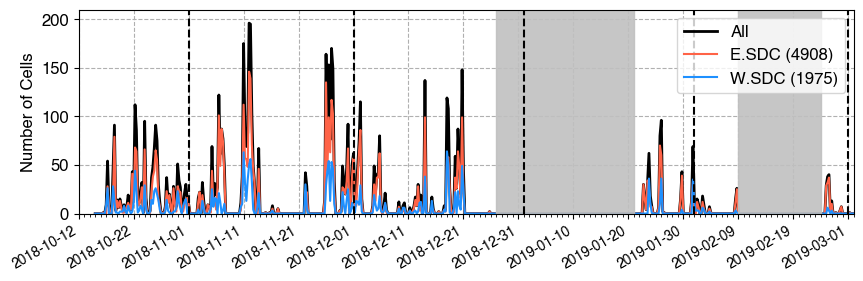

In [37]:
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.family'] = 'Helvetica'
fig, ax = plt.subplots(1, 1, figsize=[10,3], dpi=100)

outtimes1 = [pd.Timestamp('2018-12-27T00'),  pd.Timestamp('2019-2-9T00')]
outtimes2 = [pd.Timestamp('2019-1-21T00'),  pd.Timestamp('2019-2-24T00')]
monthday1 = pd.date_range(start='2018-10-1', end='2019-3-1', freq='1MS')
xlims = [pd.Timestamp('2018-10-12T00'), pd.Timestamp('2019-3-2T00')]

ax.plot(date_ts, ntracks_ts, color='k', lw=2, label=f'All')
ax.plot(date_ts, ntracks_e_ts, color='tomato', lw=1.5, label=f'E.SDC ({ntracks_e})')
ax.plot(date_ts, ntracks_w_ts, color='dodgerblue', lw=1.5, label=f'W.SDC ({ntracks_w})')
# time_fmt = mdates.DateFormatter('%b %d')
time_fmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(time_fmt)
ax.tick_params(axis='x', labelsize=10)
ax.set_ylabel('Number of Cells')
ax.set_xlim(xlims[0], xlims[1])
ax.set_ylim(0,210)
ax.grid(which='major', ls='--')
ax.legend()
# Plot outtage times
for ii in range(len(outtimes1)):
    ax.axvspan(outtimes1[ii], outtimes2[ii], color='silver',alpha=0.9,zorder=2)
for ii in range(len(monthday1)):
    ax.axvline(monthday1[ii], color='k', ls='--', lw=1.5)

fig.autofmt_xdate()
fig.savefig(f'{figdir}cellnumber_timeseries_fullcampaign.png', bbox_inches='tight', dpi=300, facecolor='w')

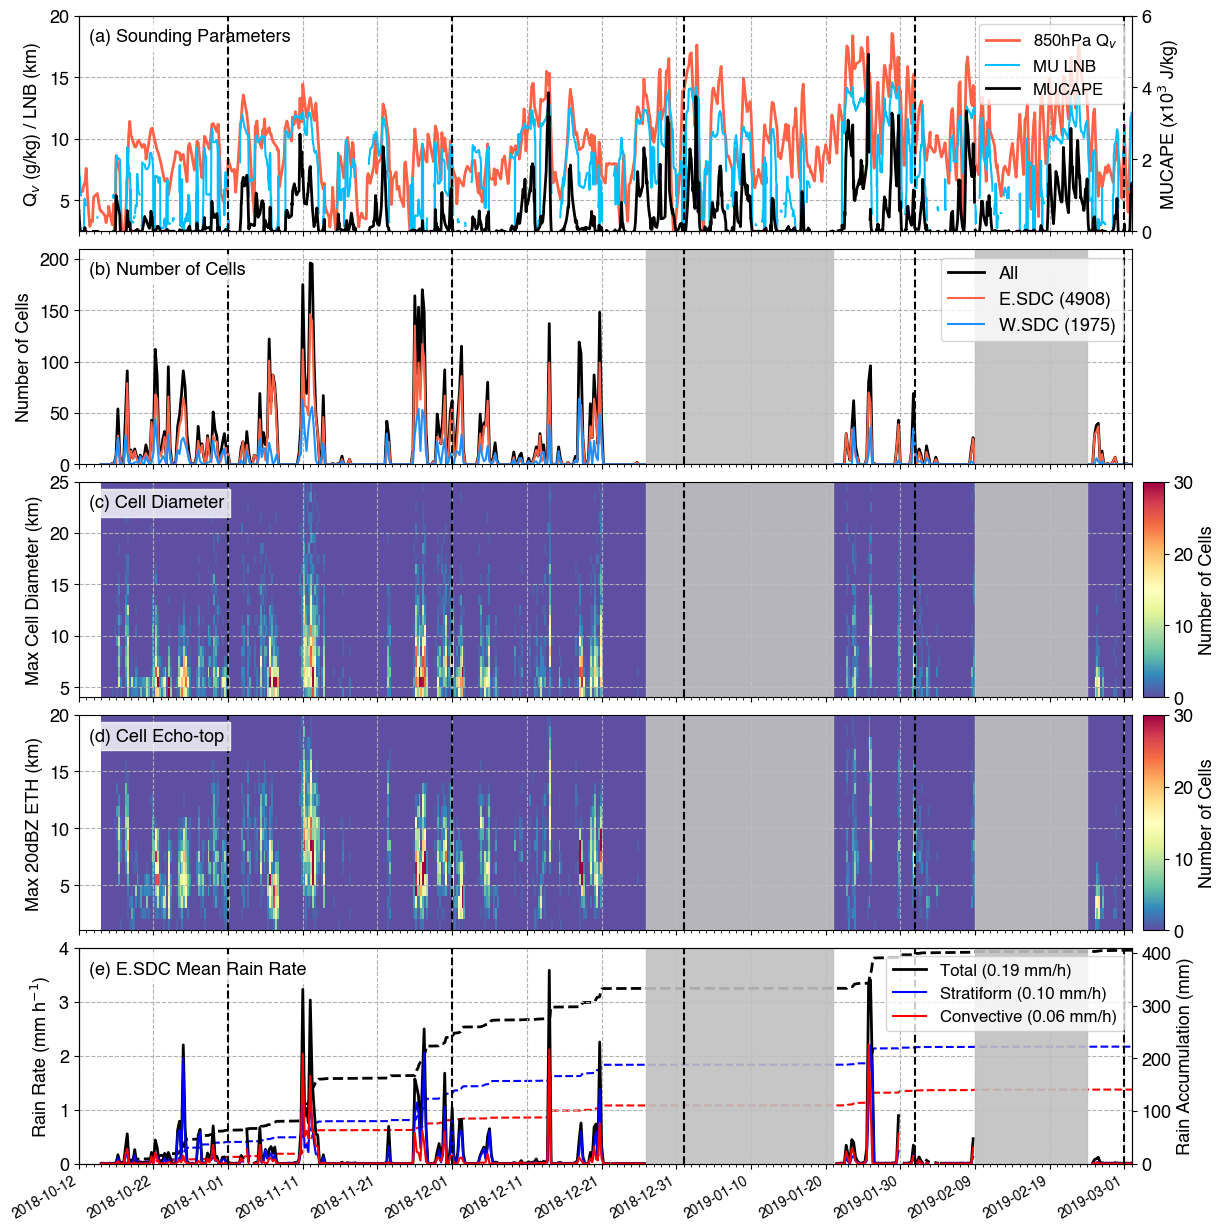

In [38]:
mpl.rcParams['font.size'] = 13
mpl.rcParams['font.family'] = 'Helvetica'
fig = plt.figure(figsize=[14,14], dpi=100)
gs = gridspec.GridSpec(5,2, height_ratios=[1,1,1,1,1], width_ratios=[1,0.02])
gs.update(bottom=0.06, wspace=0.02, hspace=0.08)

outtimes1 = [pd.Timestamp('2018-12-27T00'),  pd.Timestamp('2019-2-9T00')]
outtimes2 = [pd.Timestamp('2019-1-21T00'),  pd.Timestamp('2019-2-24T00')]
monthday1 = pd.date_range(start='2018-10-1', end='2019-3-1', freq='1MS')
xlims = [pd.Timestamp('2018-10-12T00'), pd.Timestamp('2019-3-2T00')]

ax = plt.subplot(gs[0,0])
l1 = ax.plot(sonde.time, sonde.rvap_850mb, color='tomato', lw=2, label='850hPa Q$_v$')
l2 = ax.plot(sonde.time, sonde.EL_height_mu/1000, color='deepskyblue', label='MU LNB')
time_fmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(time_fmt)
ax.tick_params(axis='x', labelsize=10)
ax.set_ylabel('Q$_v$ (g/kg) / LNB (km)')
ax.set_xlim(xlims[0], xlims[1])
ax.set_ylim(2.5,20)
ax.grid(which='major', ls='--')
t2 = ax.text(0.01, 0.88, '(a) Sounding Parameters', transform=ax.transAxes)
t2.set_bbox(dict(facecolor='w', alpha=0.8, edgecolor='w'))
# ax.legend(fontsize=12, loc='upper right')

ax2 = ax.twinx()
l3 = ax2.plot(sonde.time, sonde.CAPE_mu/1000, color='k', lw=2, label='MUCAPE')
ax2.set_ylim(0,6)
ax2.set_ylabel('MUCAPE (x10$^{3}$ J/kg)')
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax2.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax2.xaxis.set_major_formatter(time_fmt)
ax2.tick_params(axis='x', labelsize=10)
for ii in range(len(monthday1)):
    ax2.axvline(monthday1[ii], color='k', ls='--', lw=1.5)
# Add all lines to a single legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, fontsize=12, loc='upper right')

ax = plt.subplot(gs[1,0])
l1 = ax.plot(date_ts, ntracks_ts, color='k', lw=2, label=f'All')
l2 = ax.plot(date_ts, ntracks_e_ts, color='tomato', lw=1.5, label=f'E.SDC ({ntracks_e})')
l3 = ax.plot(date_ts, ntracks_w_ts, color='dodgerblue', lw=1.5, label=f'W.SDC ({ntracks_w})')
time_fmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
# ax.xaxis.set_major_formatter(time_fmt)
ax.tick_params(axis='x', labelsize=12)
ax.set_ylabel('Number of Cells')
ax.set_xlim(xlims[0], xlims[1])
ax.set_ylim(0,210)
ax.grid(which='major', ls='--')
ax.legend(loc='upper right')
t1 = ax.text(0.01, 0.88, '(b) Number of Cells', transform=ax.transAxes)
t1.set_bbox(dict(facecolor='w', alpha=0.8, edgecolor='w'))
# Plot outtage times
for ii in range(len(outtimes1)):
    ax.axvspan(outtimes1[ii], outtimes2[ii], color='silver',alpha=0.9,zorder=2)
for ii in range(len(monthday1)):
    ax.axvline(monthday1[ii], color='k', ls='--', lw=1.5)
    
ax = plt.subplot(gs[2,0])
pm1 = ax.pcolormesh(date_ts_bounds, bins_diam, celldiam_pdf_ts, shading='flat', vmax=30, cmap='Spectral_r')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.tick_params(axis='x', labelsize=12)
ax.set_ylabel('Max Cell Diameter (km)')
ax.set_xlim(xlims[0], xlims[1])
ax.set_ylim(4,25)
ax.grid(which='major', ls='--')
t2 = ax.text(0.01, 0.88, '(c) Cell Diameter', transform=ax.transAxes)
t2.set_bbox(dict(facecolor='w', alpha=0.8, edgecolor='w'))
cax = plt.subplot(gs[2,1])
cb1 = mpl.colorbar.Colorbar(ax=cax, mappable=pm1, label='Number of Cells')
# Plot outtage times
for ii in range(len(outtimes1)):
    ax.axvspan(outtimes1[ii], outtimes2[ii], color='silver',alpha=0.9,zorder=2)
for ii in range(len(monthday1)):
    ax.axvline(monthday1[ii], color='k', ls='--', lw=1.5)

# ax = plt.subplot(gs[1,0])
# pm1 = ax.pcolormesh(date_ts_bounds, bins_area, cellarea_pdf_ts, shading='flat', vmax=30, cmap='Spectral_r')
# ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
# ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
# ax.tick_params(axis='x', labelsize=12)
# ax.set_ylabel('Log$_{10}$(Max Cell Area (km))')
# ax.set_xlim(xlims[0], xlims[1])
# ax.set_ylim(1,3.2)
# ax.grid(which='major', ls='--')
# t2 = ax.text(0.01, 0.88, '(b) Cell Area', transform=ax.transAxes)
# t2.set_bbox(dict(facecolor='w', alpha=0.8, edgecolor='w'))
# cax = plt.subplot(gs[1,1])
# cb1 = mpl.colorbar.Colorbar(ax=cax, mappable=pm1, label='Number of Cells')
# # Plot outtage times
# for ii in range(len(outtimes1)):
#     ax.axvspan(outtimes1[ii], outtimes2[ii], color='silver',alpha=0.9,zorder=2)

ax = plt.subplot(gs[3,0])
pm2 = ax.pcolormesh(date_ts_bounds, bins_eth, celleth20_pdf_ts, shading='flat', vmax=30, cmap='Spectral_r')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(time_fmt)
ax.tick_params(axis='x', labelsize=12)
ax.set_ylabel('Max 20dBZ ETH (km)')
ax.set_xlim(xlims[0], xlims[1])
ax.set_ylim(1,20)
ax.grid(which='major', ls='--')
t2 = ax.text(0.01, 0.88, '(d) Cell Echo-top', transform=ax.transAxes)
t2.set_bbox(dict(facecolor='w', alpha=0.8, edgecolor='w'))
cax = plt.subplot(gs[3,1])
cb2 = mpl.colorbar.Colorbar(ax=cax, mappable=pm2, label='Number of Cells')
# Plot outtage times
for ii in range(len(outtimes1)):
    ax.axvspan(outtimes1[ii], outtimes2[ii], color='silver',alpha=0.9,zorder=2)
for ii in range(len(monthday1)):
    ax.axvline(monthday1[ii], color='k', ls='--', lw=1.5)
    
ax = plt.subplot(gs[4,0])
ax.plot(time_ts, rr_total_ts, color='k', lw=2, label=f'Total ({rr_total_avg:.02f} mm/h)')
ax.plot(time_ts, rr_strat_ts, color='blue', lw=1.5, label=f'Stratiform ({rr_strat_avg:.02f} mm/h)')
ax.plot(time_ts, rr_conv_ts, color='red', lw=1.5, label=f'Convective ({rr_conv_avg:.02f} mm/h)')
ax2 = ax.twinx()
ax2.plot(dsrain.time, ra_total, color='k', lw=2, ls='--')
ax2.plot(dsrain.time, ra_strat, lw=1.5, color='blue', ls='--')
ax2.plot(dsrain.time, ra_conv, lw=1.5, color='red', ls='--')
ax2.set_ylabel('Rain Accumulation (mm)')
ax2.set_ylim(0, 410)
ax.set_zorder(2)  # default zorder is 0 for ax and ax2
ax.patch.set_visible(False)  # prevents ax from hiding ax2
# time_fmt = mdates.DateFormatter('%b %d')
# time_fmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(time_fmt)
ax.tick_params(axis='x', labelsize=10)
ax.set_ylabel('Rain Rate (mm h$^{-1}$)')
ax.set_xlim(xlims[0], xlims[1])
ax.set_ylim(0,4)
ax.grid(which='major', ls='--')
t2 = ax.text(0.01, 0.88, '(e) E.SDC Mean Rain Rate', transform=ax.transAxes)
t2.set_bbox(dict(facecolor='w', alpha=0.8, edgecolor='w'))
ax.legend(fontsize=12, loc='upper right')
# Plot outtage times
for ii in range(len(outtimes1)):
    ax.axvspan(outtimes1[ii], outtimes2[ii], color='silver',alpha=0.9,zorder=2)
for ii in range(len(monthday1)):
    ax.axvline(monthday1[ii], color='k', ls='--', lw=1.5)
    
fig.autofmt_xdate()
fig.savefig(f'{figdir}cellnumber_diameter_ETH20dBZ_timeseries_fullcampaign.png', bbox_inches='tight', dpi=300, facecolor='w')
# fig.savefig(f'{figdir}cellnumber_diameter_ETH20dBZ_timeseries_fullcampaign.pdf', bbox_inches='tight', dpi=300, facecolor='w')

In [39]:
figdir

'/gpfs/wolf2/arm/atm131/proj-shared/zfeng/cacti/csapr/taranis_corcsapr2cfrppiqcM1_celltracking.c1.v2/figures/celltrack_environment_stats/'

(0.0, 6.0)

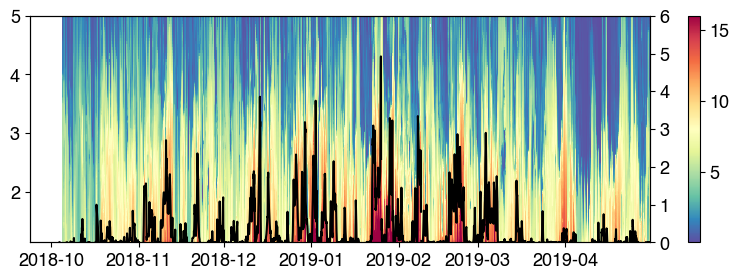

In [40]:
fig, ax1 = plt.subplots(figsize=[10,3], dpi=100)
pcm3 = ax1.pcolormesh(dsprof.time, dsprof.height, dsprof.sh.transpose()*1000, vmax=16, shading='nearest', cmap='Spectral_r')
ax1.set_ylim(1.14, 5)
plt.colorbar(pcm3)

ax2 = ax1.twinx()
ax2.plot(sonde.time, sonde.CAPE_mu/1000., color='k')
ax2.set_ylim(0, 6)

(0.0, 6.0)

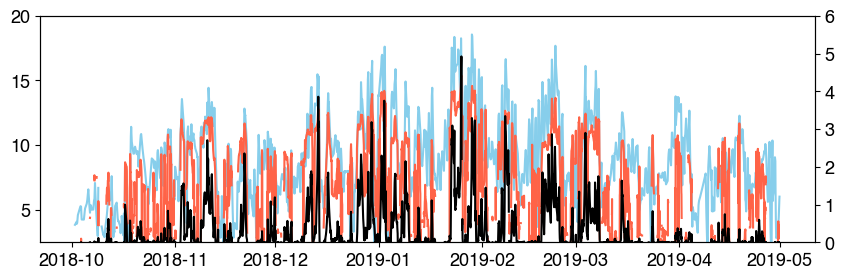

In [41]:
fig, ax = plt.subplots(figsize=[10,3], dpi=100)
l1 = ax.plot(sonde.time, sonde.rvap_850mb, color='skyblue')
l2 = ax.plot(sonde.time, sonde.EL_height_mu/1000, color='tomato')
ax.set_ylim(2.5,20)
# l1 = ax.plot(sonde.time, sonde.PW_interpsonde, color='b')
# l2 = ax.plot(sonde.time, sonde.PW_mwr, color='skyblue')
# ax.set_ylim(0,6)
ax2 = ax.twinx()
ax2.plot(sonde.time, sonde.CAPE_mu/1000, color='k')
ax2.set_ylim(0,6)

(5.0, 50.0)

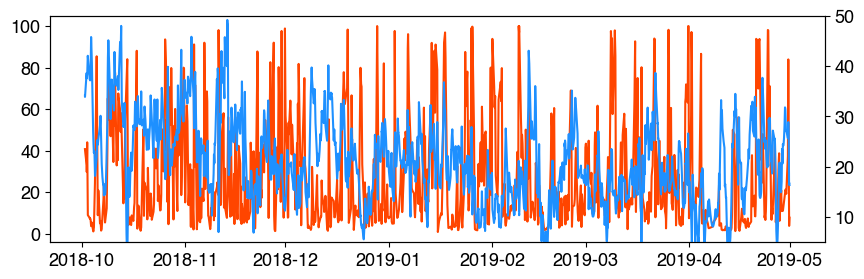

In [42]:
fig, ax = plt.subplots(figsize=[10,3], dpi=100)
l1 = ax.plot(sonde.time, sonde.rh_500mb, color='orangered')
# l1.set_ylim(0,10)
ax2 = ax.twinx()
# l2 = ax2.plot(sonde.time, sonde.rvap_700mb, color='dodgerblue')
l2 = ax2.plot(sonde.time, sonde.shear_mag_bulk_0to6km, color='dodgerblue')
ax2.set_ylim(5,50)

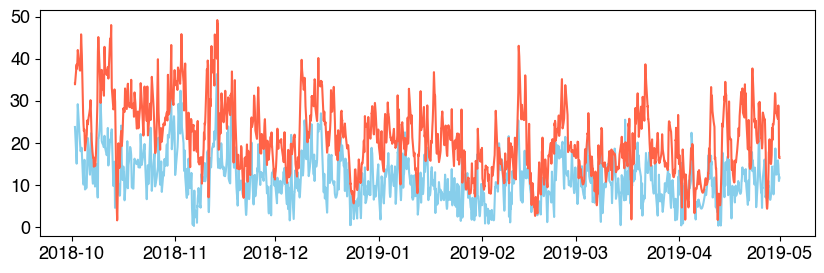

In [43]:
fig, ax = plt.subplots(figsize=[10,3], dpi=100)
l1 = ax.plot(sonde.time, sonde.shear_mag_bulk_0to3km, color='skyblue')
l2 = ax.plot(sonde.time, sonde.shear_mag_bulk_0to6km, color='tomato')

In [44]:
CAPE_mu = sonde.CAPE_mu.values
PW_interpsonde = sonde.PW_interpsonde.values
PW_mwr = sonde.PW_mwr.values
idx = np.where(~np.isnan(CAPE_mu) & ~np.isnan(PW_interpsonde) & ~np.isnan(PW_mwr))[0]
CAPE_mu = CAPE_mu[idx]
PW_interpsonde = PW_interpsonde[idx]
PW_mwr = PW_mwr[idx]
corr_CAPE_PWsonde = np.ma.corrcoef(CAPE_mu, PW_interpsonde, allow_masked=True)
corr_CAPE_PWmwr = np.ma.corrcoef(CAPE_mu, PW_mwr, allow_masked=True)
rho_CAPE_PWsonde = corr_CAPE_PWsonde[0,1]
rho_CAPE_PWmwr = corr_CAPE_PWmwr[0,1]
# np.corrcoef(CAPE_mu, PW_interpsonde)
print(f'CAPE-PWsonde correlation: {rho_CAPE_PWsonde}')
print(f'CAPE-PWmwr correlation: {rho_CAPE_PWmwr}')

CAPE-PWsonde correlation: 0.5234389068090699
CAPE-PWmwr correlation: 0.06551502357499189


In [45]:
sonde.PW_mwr.attrs

{'units': 'cm',
 'description': 'Precipitable water retrieved from microwave radiometer (phys_pwv from mwrret1liljclou VAP)'}

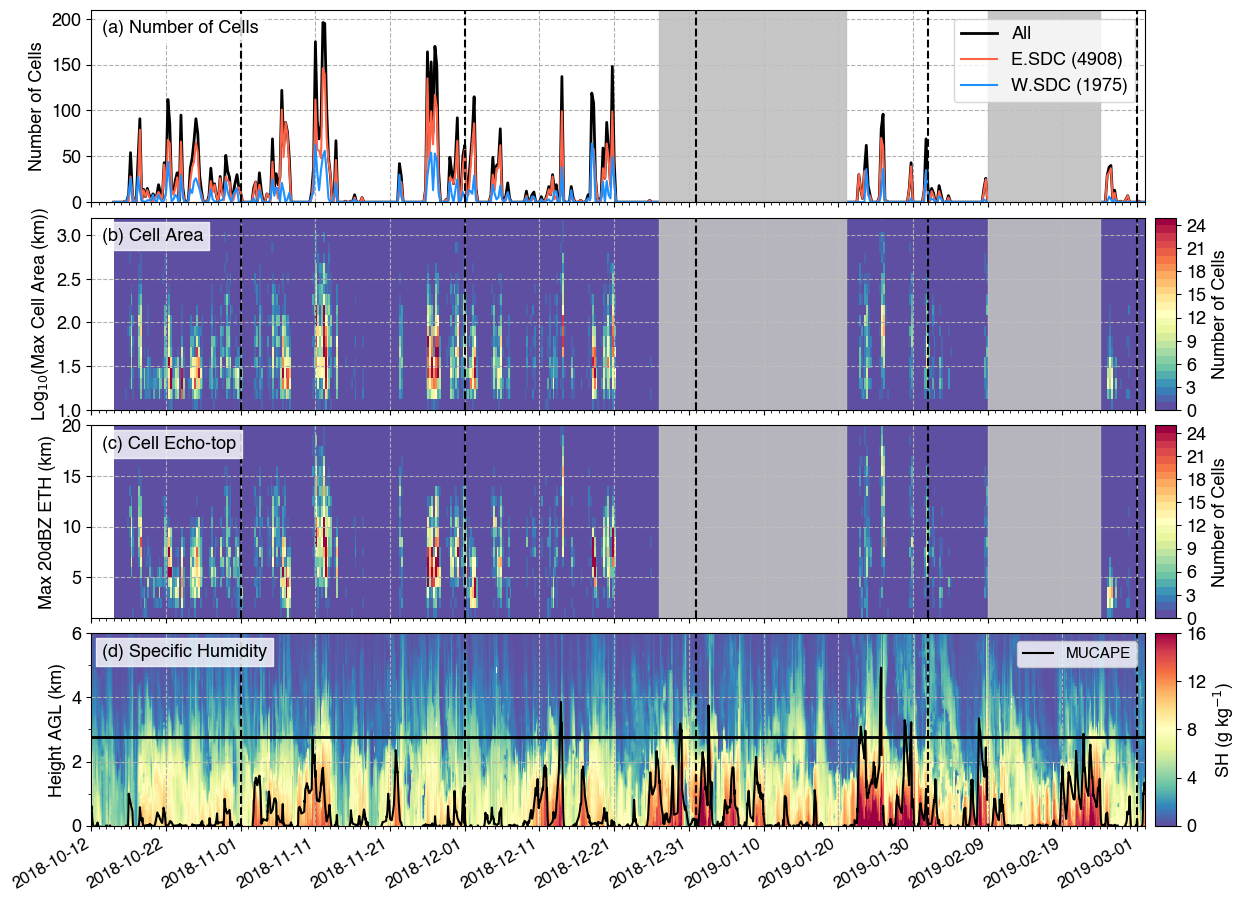

In [46]:
mpl.rcParams['font.size'] = 13
mpl.rcParams['font.family'] = 'Helvetica'
fig = plt.figure(figsize=[14,12], dpi=100)
gs = gridspec.GridSpec(4,2, height_ratios=[1,1,1,1], width_ratios=[1,0.02])
gs.update(wspace=0.02, hspace=0.08)

outtimes1 = [pd.Timestamp('2018-12-27T00'),  pd.Timestamp('2019-2-9T00')]
outtimes2 = [pd.Timestamp('2019-1-21T00'),  pd.Timestamp('2019-2-24T00')]
monthday1 = pd.date_range(start='2018-10-1', end='2019-3-1', freq='1MS')
time_fmt = mdates.DateFormatter('%Y-%m-%d')
xlims = [pd.Timestamp('2018-10-12T00'), pd.Timestamp('2019-3-2T00')]

# ax = axes[0]
ax = plt.subplot(gs[0,0])
l1 = ax.plot(date_ts, ntracks_ts, color='k', lw=2, label=f'All')
l2 = ax.plot(date_ts, ntracks_e_ts, color='tomato', lw=1.5, label=f'E.SDC ({ntracks_e})')
l3 = ax.plot(date_ts, ntracks_w_ts, color='dodgerblue', lw=1.5, label=f'W.SDC ({ntracks_w})')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
# ax.xaxis.set_major_formatter(time_fmt)
ax.tick_params(axis='x', labelsize=12)
ax.set_ylabel('Number of Cells')
ax.set_xlim(xlims[0], xlims[1])
ax.set_ylim(0,210)
ax.grid(which='major', ls='--')
ax.legend(loc='upper right')
t1 = ax.text(0.01, 0.88, '(a) Number of Cells', transform=ax.transAxes)
t1.set_bbox(dict(facecolor='w', alpha=0.8, edgecolor='w'))
# Plot outtage times
for ii in range(len(outtimes1)):
    ax.axvspan(outtimes1[ii], outtimes2[ii], color='silver',alpha=0.9,zorder=2)
for ii in range(len(monthday1)):
    ax.axvline(monthday1[ii], color='k', ls='--', lw=1.5)
    
ax = plt.subplot(gs[1,0])
cmap = plt.get_cmap('Spectral_r')
levels = np.arange(0, 25.1, 1)
norm = mpl.colors.BoundaryNorm(boundaries=levels, ncolors=cmap.N)
pm1 = ax.pcolormesh(date_ts_bounds, bins_area, cellarea_pdf_ts, shading='flat', norm=norm, cmap=cmap)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.tick_params(axis='x', labelsize=12)
ax.set_ylabel('Log$_{10}$(Max Cell Area (km))')
ax.set_xlim(xlims[0], xlims[1])
ax.set_ylim(1,3.2)
ax.grid(which='major', ls='--')
t2 = ax.text(0.01, 0.88, '(b) Cell Area', transform=ax.transAxes)
t2.set_bbox(dict(facecolor='w', alpha=0.8, edgecolor='w'))
cax = plt.subplot(gs[1,1])
cb1 = mpl.colorbar.Colorbar(ax=cax, mappable=pm1, label='Number of Cells')
# Plot outtage times
for ii in range(len(outtimes1)):
    ax.axvspan(outtimes1[ii], outtimes2[ii], color='silver',alpha=0.9,zorder=2)
for ii in range(len(monthday1)):
    ax.axvline(monthday1[ii], color='k', ls='--', lw=1.5)

ax = plt.subplot(gs[2,0])
cmap = plt.get_cmap('Spectral_r')
levels = np.arange(0, 25.1, 1)
norm = mpl.colors.BoundaryNorm(boundaries=levels, ncolors=cmap.N)
pm2 = ax.pcolormesh(date_ts_bounds, bins_eth, celleth20_pdf_ts, shading='flat', norm=norm, cmap=cmap)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
# ax.xaxis.set_major_formatter(time_fmt)
ax.tick_params(axis='x', labelsize=12)
ax.set_ylabel('Max 20dBZ ETH (km)')
ax.set_xlim(xlims[0], xlims[1])
ax.set_ylim(1,20)
ax.grid(which='major', ls='--')
t2 = ax.text(0.01, 0.88, '(c) Cell Echo-top', transform=ax.transAxes)
t2.set_bbox(dict(facecolor='w', alpha=0.8, edgecolor='w'))
cax = plt.subplot(gs[2,1])
cb2 = mpl.colorbar.Colorbar(ax=cax, mappable=pm2, label='Number of Cells')
# Plot outtage times
for ii in range(len(outtimes1)):
    ax.axvspan(outtimes1[ii], outtimes2[ii], color='silver',alpha=0.9,zorder=2)
for ii in range(len(monthday1)):
    ax.axvline(monthday1[ii], color='k', ls='--', lw=1.5)
    
ax = plt.subplot(gs[3,0])
cmap = plt.get_cmap('Spectral_r')
levels = np.arange(0, 16.1, 0.1)
norm = mpl.colors.BoundaryNorm(boundaries=levels, ncolors=cmap.N)
pm3 = ax.pcolormesh(dsprof.time, dsprof.height-1.141, dsprof.sh.transpose()*1000, shading='nearest', norm=norm, cmap=cmap)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(2))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(time_fmt)
ax.tick_params(axis='x', labelsize=12)
ax.set_ylabel('Height AGL (km)')
ax.set_xlim(xlims[0], xlims[1])
ax.set_ylim(0,6)
# ax.set_yticks(np.arange(0, 6.1, 1))
ax.grid(which='major', ls='--')
t2 = ax.text(0.01, 0.88, '(d) Specific Humidity', transform=ax.transAxes)
t2.set_bbox(dict(facecolor='w', alpha=0.8, edgecolor='w'))
cax = plt.subplot(gs[3,1])
cb3 = mpl.colorbar.Colorbar(ax=cax, mappable=pm3, label='SH (g kg$^{-1}$)')
cb3.set_ticks(np.arange(0,16.1,4))
for ii in range(len(monthday1)):
    ax.axvline(monthday1[ii], color='k', ls='--', lw=1.5)
ax.axhline(2.77, color='k', lw=2)
# Plot MUCAPE
l4a = ax.plot(sonde.time, sonde.CAPE_mu/1000., color='k', lw=1.5, label='MUCAPE')
# l4b = ax.plot(sonde.time, sonde.PW_interpsonde, color='magenta', lw=1, label='PWV')
ax.legend(loc='upper right', fontsize=11)

fig.autofmt_xdate()
fig.savefig(f'{figdir}cellnumber_area_ETH20dBZ_SH_MUCAPE_timeseries_fullcampaign.png', bbox_inches='tight', dpi=300, facecolor='w')

In [47]:
figdir

'/gpfs/wolf2/arm/atm131/proj-shared/zfeng/cacti/csapr/taranis_corcsapr2cfrppiqcM1_celltracking.c1.v2/figures/celltrack_environment_stats/'